<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Homework # 3



---

In [80]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [81]:
# A: 
data = {'X':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Y':[.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [82]:
# A:
pre_df = pd.DataFrame.from_dict(data)

# Andrew--why is it sometimes necessary to call the package being used and other times it is not?

### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [86]:
# A: 
new_X = pre_df.X + 10
new_Y = pre_df.Y + 3

new_df = pd.DataFrame(list(zip(new_X,new_Y)),
               columns =['new_X', 'new_Y'])

,new_X,new_Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [89]:
# A:

df = pd.concat([pre_df,new_df],axis=1)
df

,X,Y,new_X,new_Y
0,1,0.50,11,3.50
1,2,0.70,12,3.70
2,3,0.80,13,3.80
3,4,0.99,14,3.99
4,5,1.00,15,4.00
5,6,1.40,16,4.40
6,7,1.80,17,4.80
7,8,2.10,18,5.10
8,9,2.40,19,5.40
9,10,2.90,20,5.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

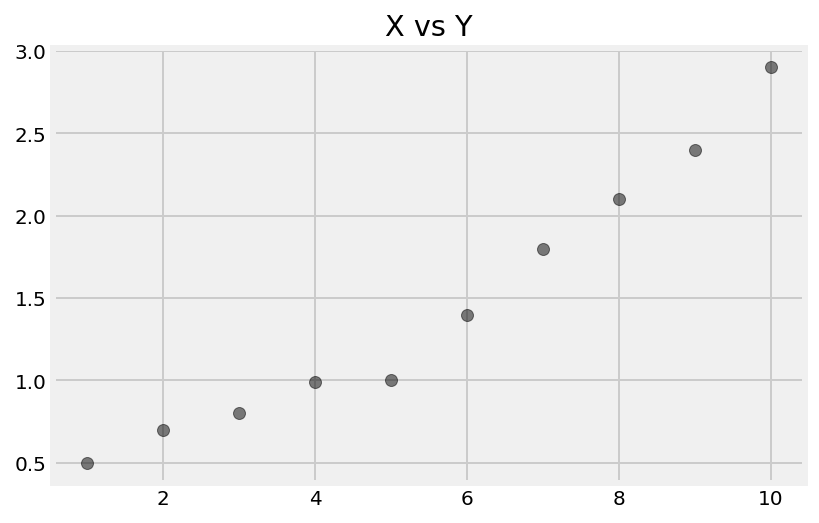

In [96]:
# A:
plt.scatter(df['X'],df['Y'],c='k', alpha=0.5)
plt.title('X vs Y')
plt.show()


### Using statsmodels, fit an OLS regression to your data and print our the summary

Documentation here: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

Looking at a summary: https://www.statsmodels.org/dev/example_formulas.html

In [99]:
# A:
import statsmodels.api as sm

import statsmodels.formula.api as smf



mod = smf.ols(formula = 'Y ~ X',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.79e-06
Time:                        10:34:39   Log-Likelihood:                 3.4363
No. Observations:                  10   AIC:                            -2.873
Df Residuals:                       8   BIC:                            -2.268
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0313      0.131      0.239      0.8

C:\Users\asiminovsky\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Using the model you fitted, answer the following questions:

### What is the R-squared for the model?

In [8]:
# A:0.950

### What is the p-value for your X?

In [9]:
# A: p < .01 (.000)

### What is the intercept?

In [10]:
# A: 0.0313 

### Using the above, write the equation for our model

In [11]:
# A: Y = 0.0313 + 0.2596* X

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [12]:
# A: x = 20: 5.2233

In [13]:
# A: x = 21: 5.4829

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [100]:
# A:
res.predict(exog=dict(X=20))

0    5.222848
dtype: float64

In [101]:
res.predict(exog=dict(X=21))

0    5.482424
dtype: float64

### Get the residuals by using the predictions for every X (y_hats) and the true y values

In [102]:
# A:
res.resid

0    0.209091
1    0.149515
2   -0.010061
3   -0.079636
4   -0.329212
5   -0.188788
6   -0.048364
7   -0.007939
8    0.032485
9    0.272909
dtype: float64

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

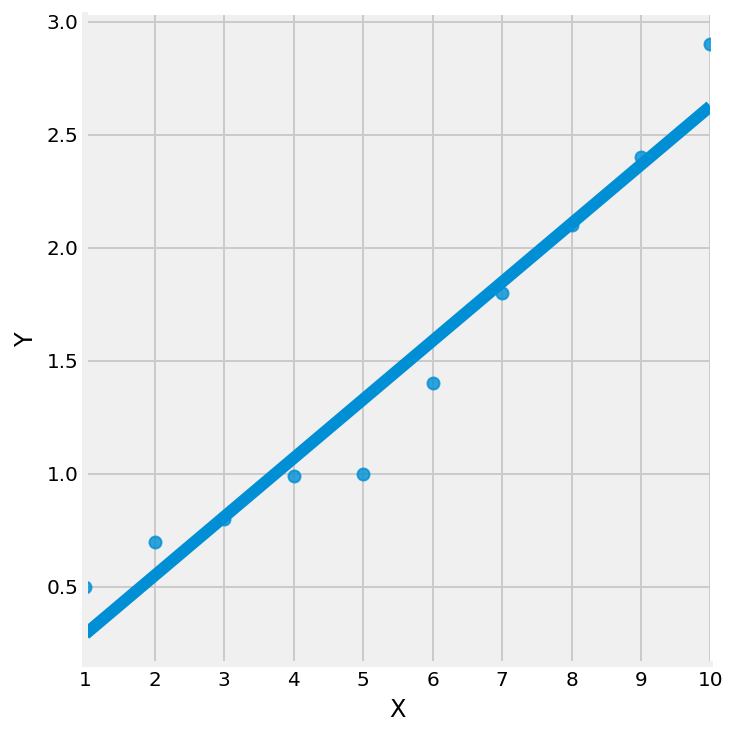

In [104]:
# A:
sns.lmplot(x='X', y='Y', data=df, ci=None);

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = 'data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [5]:
# A:
nhl_data = pd.read_csv(local_csv)
nhl_data

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Florida11,72,3,2155:11:00,78,96,2.17,2.67,44.8,1151,...,49.3,2101,2151,58.5,59.9,49.4,6.78,91.99,988,1270
86,Columbus11,68,3,2034:54:00,86,93,2.54,2.74,48.0,1075,...,51.1,1975,1905,58.2,56.2,50.9,8.00,91.18,992,1077
87,Colorado12,65,3,2129:37:00,83,89,2.34,2.51,48.3,1157,...,49.6,2123,2059,59.8,58.0,50.8,7.17,92.27,994,902
88,Edmonton10,62,3,1983:44:00,72,107,2.18,3.24,40.2,982,...,45.6,1765,2149,53.4,65.0,45.1,7.33,90.51,978,723


### 2. Perform any required data cleaning. Do some EDA.

In [4]:
# A: I tried to do a quick-ish version here in the next few cells.

In [6]:
nhl_data.dtypes
# based on the preview of the data above, these seem to be correct.

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [7]:
nhl_data.shape

(90, 28)

In [8]:
nhl_data.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [10]:
nhl_data.apply(lambda x: sum(x.isnull()),axis=0)
# There appear to be no null values

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

<AxesSubplot:>

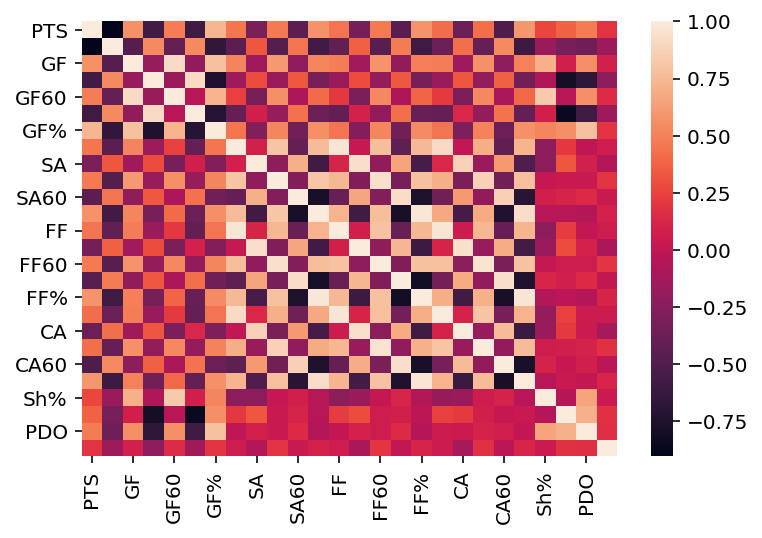

In [11]:
corr = nhl_data.corr()
sns.heatmap(corr)

In [28]:
nhl_data['Rank'].value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [34]:
# A: There are three classes as per the above.

y = nhl_data.Rank


### 4. What is the baseline accuracy?

In [64]:
# A: Since the most frequent rank is 3 (31 instances), the baseline accuracy is 31%.

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [7]:
# A:
feature_cols = ['SA', 'GA', 'SF', 'PDO']
X = nhl_data[feature_cols]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [22]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.5217391304347826


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A: The accuracy is better than baseline by about 21%. This seems legitimate as more predictors were added to the model.

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [36]:
# A:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

# By increasing neigbors from 1 to 4, I increased accuracy by about 8%.


0.6


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [37]:
# A:

knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

# The accuracy is approximately baseline when K== the number of rows in the training data--likely overfitting the data.

0.3111111111111111


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [43]:
# A:
scores = []
for k in range(1,X_train.shape[0]): # in the event that my data change shape in the future, this is a generalized solution
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])b

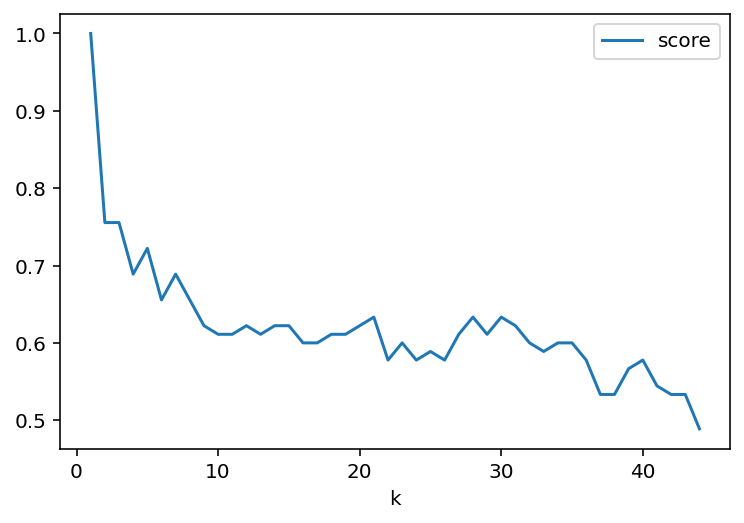

In [44]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [74]:
# A:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
scores = []
train_index = range(0,45)
test_index = range(0,45)
n = 0

for i in range(5,20):
    
    print("CROSS VALIDATION each fold" + str(i))
    for train_index, test_index in kf.split(X_train,y_train):
        knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)

        mse_values.append(metrics.mean_squared_error(y_train, knn.predict(X_train)))
        scores.append([knn.score(X_train, y_train),i])
        print('Model {}'.format(n))
        print('MSE: {}'.format(mse_values[n-1]))
        print('R2: {}\n'.format(scores[n-1]))


    print("SUMMARY OF CROSS VALIDATION")
    print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
    print('Mean of R2 for all folds: {}'.format(np.mean(scores)))
    
    # problem: R2s are higher than 1.00

CROSS VALIDATION each fold5
Model 0
MSE: 0.5111111111111111
R2: [0.6888888888888889, 5]

Model 0
MSE: 0.5111111111111111
R2: [0.6888888888888889, 5]

Model 0
MSE: 0.5111111111111111
R2: [0.6888888888888889, 5]

Model 0
MSE: 0.5111111111111111
R2: [0.6888888888888889, 5]

Model 0
MSE: 0.5111111111111111
R2: [0.6888888888888889, 5]

SUMMARY OF CROSS VALIDATION
Mean of MSE for all folds: 0.5111111111111111
Mean of R2 for all folds: 2.8444444444444446
CROSS VALIDATION each fold6
Model 0
MSE: 0.4888888888888889
R2: [0.6444444444444445, 6]

Model 0
MSE: 0.4888888888888889
R2: [0.6444444444444445, 6]

Model 0
MSE: 0.4888888888888889
R2: [0.6444444444444445, 6]

Model 0
MSE: 0.4888888888888889
R2: [0.6444444444444445, 6]

Model 0
MSE: 0.4888888888888889
R2: [0.6444444444444445, 6]

SUMMARY OF CROSS VALIDATION
Mean of MSE for all folds: 0.5
Mean of R2 for all folds: 3.0833333333333335
CROSS VALIDATION each fold7
Model 0
MSE: 0.5777777777777777
R2: [0.6222222222222222, 7]

Model 0
MSE: 0.5777777

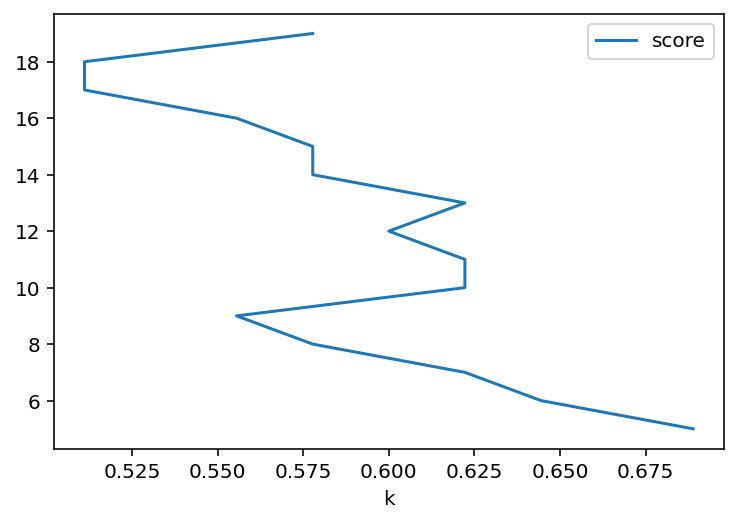

In [75]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [78]:
# A:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X)
X_test_std = scaler.transform(X)

from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
scores = []
train_index = range(0,45)
test_index = range(0,45)
n = 0

for i in range(5,20):
    
    print("CROSS VALIDATION each fold" + str(i))
    for train_index, test_index in kf.split(X_train_std,y_train):
        knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_std, y_train)

        mse_values.append(metrics.mean_squared_error(y_train, knn.predict(X_train_std)))
        scores.append([knn.score(X_train_std, y_train),i])
        print('Model {}'.format(n))
        print('MSE: {}'.format(mse_values[n-1]))
        print('R2: {}\n'.format(scores[n-1]))


    print("SUMMARY OF CROSS VALIDATION")
    print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
    print('Mean of R2 for all folds: {}'.format(np.mean(scores)))
    
    # problem: R2s are higher than 1.00

CROSS VALIDATION each fold5


ValueError: Found input variables with inconsistent numbers of samples: [90, 45]

In [16]:
# A: I tried for a while to troubleshoot the above but was unsuccessful.